# Practical Machine Learning
# Lab 3

## Bag of words. Data normalization. KRR.

### Bag of words
The bag of words method is used to represent text data. It is based on the occurrences of the words in the text.
The method works as follows:
    - compute a vocabulary by giving an unique id to each word in the training set.
    - represent each training/testing example as a vector of the same length as the vocabulary, the vector is built in the following way:
        feature[word_idx] = the number of occurrences of the word that has the id 'word_idx' in the example.

### Data normalization using the scikit-learn library.
There are two common forms of data preprocessing (normalization) a matrix $X$ of size [$N X D$], where $N$ is the number of data and $D$ is their dimensionality:
    - Standard scaling
    - L1, L2 scaling.

#### Standard scaling

It substract the mean across every individual $feature$ in the data, and has the geometric interpretation of centering the data around the origin (0, 0,..., 0) along every dimension. Then, it divides each dimension by its standard deviation.
We want the $features$ to have equal $scales$ to be of approximately $equal$ $importance$ to the $learning$ $algorithm$. 

![scaling.png](imgs/scaling.png)
__Left__: Original data, 2-dimensional input data. __Middle__: The data is zero-centered by subtracting the mean in each dimension. The data cloud is centered around the origin. __Right__: Each dimension is additionally scaled by its standard deviation. The red line indicate the extent of the data - they are of unequal length in the middle, but of equal length on the right.

In [1]:
from scipy.stats import alpha
from sklearn import preprocessing # import the preprocessing library
import numpy as np

x_train = np.array([[1, -1, 2], [2, 0, 0], [0, 1, -1]], dtype=np.float64)
x_test = np.array([[-1, 1, 0]], dtype=np.float64)
 
# define the normalizer
scaler = preprocessing.StandardScaler()
# compute the mean and the std on the training set
scaler.fit(x_train)

# print the mean
print('mean =', scaler.mean_)  
# print the standard deviation
print('std =', scaler.scale_) 

# scaling the training data
scaled_x_train = scaler.transform(x_train)
print(scaled_x_train)  

# scaling the test data
scaled_x_test = scaler.transform(x_test)
print(scaled_x_test)      

mean = [1.         0.         0.33333333]
std = [0.81649658 0.81649658 1.24721913]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[[-2.44948974  1.22474487 -0.26726124]]


#### $L_1$ and $L_2$ normalization
We divide each training and test example by their norm (norm 1 or norm 2) in order to have the norm equals to 1.
$$x{\_}scaled_1 = \frac{X}{\mid\mid X \mid\mid_1}, \mid\mid X \mid\mid_1 = \sum_{i=1}^{i=n}\mid x_i \mid $$
$$x{\_}scaled_2 = \frac{X}{\mid\mid X \mid\mid_2}, \mid\mid X \mid\mid_2 = \sqrt{\sum_{i=1}^{i=n} x_i ^ 2 }$$

![data1.png](imgs/data1.png)
__Left__: Original data, 2-dimensional input data. __Middle__: The data is normalized by dividing each feature vector by its $L_2$ norm. __Right__: The data is normalized by dividing each feature vector by its $L_1$ norm.

In [2]:
x_train = np.array([[1, -1, 2], [2, 0, 0], [0, 1, -1]], dtype=np.float64)
x_test = np.array([[-1, 1, 0]], dtype=np.float64)

# define the normalizer
scaler = preprocessing.Normalizer(norm='l1') 
# scaler = preprocessing.Normalizer(norm='l2')
scaler.fit(x_train)

# scaling the training data
scaled_x_train = scaler.transform(x_train)
print(scaled_x_train)  

# scaling the test data
scaled_x_test = scaler.transform(x_test)
print(scaled_x_test)      

[[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]
[[-0.5  0.5  0. ]]


## Regression

### Linear regression

We want to find some weights $W$ such that:
$$y_{hat} = \sum_{i=1}^{i=n}x_iw_i + b$$
that interpolates best a set of examples ${(X_1,y_1), (X_2, y_2),..(X_n, y_n)}$

In order to find this function, we will minimize the $M$ean $S$quared $E$rror value on the training set.

$$MSE (y_i, y_{hat_i})  =\sum_{i=1}^{i=n}(y_{hat_i} - y_i)^2$$


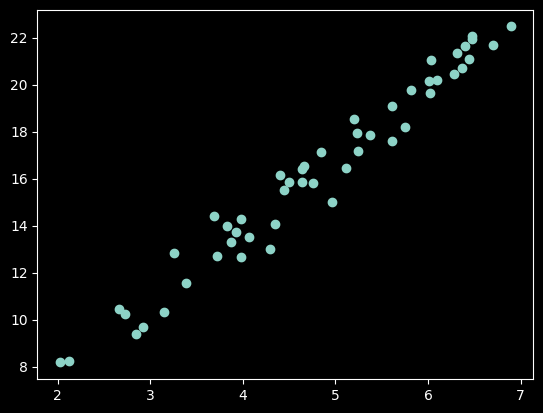

In [3]:
# Example
# load data
import numpy as np
import matplotlib.pyplot as plt

training_data = np.load('data/regression_training_data.npy')
training_labels = np.load('data/regression_training_labels.npy')

plt.plot(training_data, training_labels, 'o')
plt.show()



the coefficient is:  [3.04918197]
the bias is:  1.6389585049735729


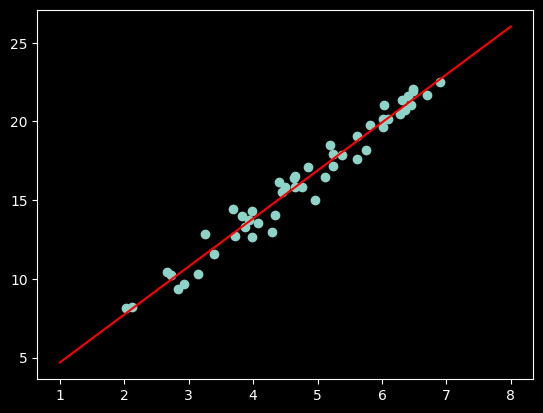

In [4]:
# train a linear regression
from sklearn.linear_model import LinearRegression
  
# define the model
linear_regression_model = LinearRegression()

# train the model
linear_regression_model.fit(np.expand_dims(training_data, axis=1), training_labels)

print('the coefficient is: ', linear_regression_model.coef_)
print('the bias is: ', linear_regression_model.intercept_)

X = np.linspace(1, 8, 1000) 
predicted_labels = linear_regression_model.predict(np.expand_dims(X, axis=1))

plt.plot(training_data, training_labels, 'o')
plt.plot(X, predicted_labels, 'r')
plt.show()


### Ridge regression

When using Ridge regression we add a new penalty to the loss function, instead of just minimizing the difference of the output and ground-truth value, we also want the weights to be small. In order to force the weights to be small, we add the $L_2$ norm of the weights to the cost function.

$$cost (y_i, y_{hat_i})  =\sum_{i=1}^{i=n}(y_{hat_i} - y_i)^2 + \alpha\mid\mid W \mid\mid_2$$

The $\alpha$ parameter controls how much we want the weights to be small.

the coefficient is:  [3.04918197]
the bias is:  1.6389585049735746


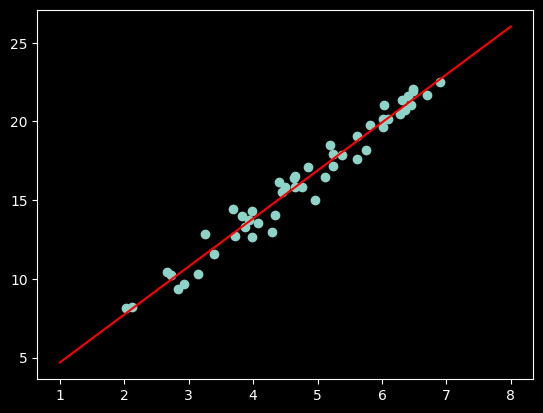

In [8]:
# train a ridge regression
from sklearn.linear_model import Ridge
  
# define the model
ridge_regression_model = Ridge(alpha=0) # Change alpha to 0, 1, 100 and explain the results

# train the model
ridge_regression_model.fit(np.expand_dims(training_data, axis=1), training_labels)

print('the coefficient is: ', ridge_regression_model.coef_)
print('the bias is: ', ridge_regression_model.intercept_)

X = np.linspace(1, 8, 1000) 
predicted_labels = ridge_regression_model.predict(np.expand_dims(X, axis=1))

plt.plot(training_data, training_labels, 'o')
plt.plot(X, predicted_labels, 'r')
plt.show()

### Lasso regression
Lasso regression adds the $L_1$ norm to the cost function.
$$cost (y_i, y_{hat_i})  =\sum_{i=1}^{i=n}(y_{hat_i} - y_i)^2 + \alpha \mid\mid W \mid\mid_1$$


the coefficient is:  [3.04918197]
the bias is:  1.6389585049735729


/home/dveduard/projects/unibuc-fmi/nlp-1-1-practical-machine-learning/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/dveduard/projects/unibuc-fmi/nlp-1-1-practical-machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dveduard/projects/unibuc-fmi/nlp-1-1-practical-machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+01, tolerance: 7.896e-02
Linear regression models with a

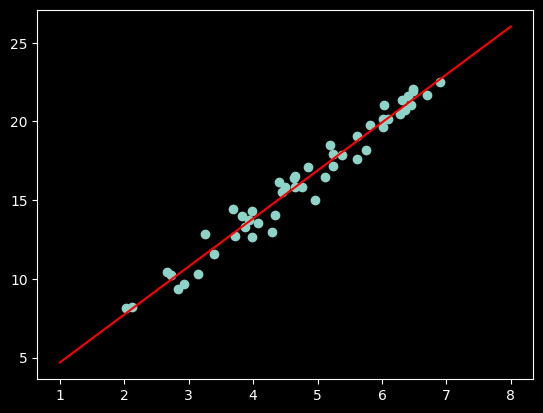

In [12]:
# train a lasso regression
from sklearn.linear_model import Lasso
  
# define the model
lasso_regression_model = Lasso(alpha=0) # Change alpha to 0, 1, 10 and explain the results

# train the model
lasso_regression_model.fit(np.expand_dims(training_data, axis=1), training_labels)

print('the coefficient is: ', lasso_regression_model.coef_)
print('the bias is: ', lasso_regression_model.intercept_)

X = np.linspace(1, 8, 1000) 
predicted_labels = lasso_regression_model.predict(np.expand_dims(X, axis=1))

plt.plot(training_data, training_labels, 'o')
plt.plot(X, predicted_labels, 'r')
plt.show()

## Kernel Ridge Regression

This algorithm combines the Ridge regression with the kernel functions.
It minimizes the function:
   $$(y_{hat} - y)^2 + alpha * \mid\mid W \mid\mid_2^2$$ 
   where:
   
   $y_{hat} = \sum_{i=1}^{i=n}a_ik(x_i, x'),$
   
   $a = (K + \lambda I_n)^{-1}y$
   
   $y$ - the ground truth label, 
   
   $y_{hat}$ - the predicted label,
   
   $K$ - kernel function.
   ![kernel_function.png](imgs/kernel_function.png)

In [0]:
# don't run, it is not functional

# import the model
from sklearn.kernel_ridge import KernelRidge

# define the model 
kernel_ridge_regression = KernelRidge(alpha, kernel, gamma)

# train the model
kernel_ridge_regression.fit(training_data, training_labels)

# predict
predicted_labels = kernel_ridge_regression.predict(test_data)

NameError: name 'alpha' is not defined

## Automated Essay Scoring

We are going to use the Automated Essay Scoring dataset that contains essays and their marks (the marks are in the range [2, 12]). 
Our task is to train a model that predicts the mark of an essay based on its BOW representation.
![example_aes.png](imgs/example_aes.png)

This is an example of sentences from the dataset. The dataset has been processed such the sentences were splitted in words and you have a list of words for each essay saved in an numpy array.

In [0]:
import numpy as np

In [20]:
# load dataset 
training_data = np.load('data/essay_scoring/train_data.npy', allow_pickle=True)
print('the first essay is:', training_data[0])
train_scores = np.load('data/essay_scoring/train_scores.npy', allow_pickle=True)

test_data = np.load('data/essay_scoring/test_data.npy', allow_pickle=True)
test_scores = np.load('data/essay_scoring/test_scores.npy', allow_pickle=True)

the first essay is: ['dear', 'local', 'newspaper', 'i', 'think', 'effects', 'computers', 'have', 'on', 'people', 'are', 'great', 'learning', 'skillsaffects', 'because', 'they', 'give', 'us', 'time', 'to', 'chat', 'with', 'friendsnew', 'people', 'helps', 'us', 'learn', 'about', 'the', 'globeastronomy', 'and', 'keeps', 'us', 'out', 'of', 'troble', 'thing', 'about', 'dont', 'you', 'think', 'so', 'how', 'would', 'you', 'feel', 'if', 'your', 'teenager', 'is', 'always', 'on', 'the', 'phone', 'with', 'friends', 'do', 'you', 'ever', 'time', 'to', 'chat', 'with', 'your', 'friends', 'or', 'buisness', 'partner', 'about', 'things', 'well', 'now', 'theres', 'a', 'new', 'way', 'to', 'chat', 'the', 'computer', 'theirs', 'plenty', 'of', 'sites', 'on', 'the', 'internet', 'to', 'do', 'so', '@organization1', '@organization2', '@caps1', 'facebook', 'myspace', 'ect', 'just', 'think', 'now', 'while', 'your', 'setting', 'up', 'meeting', 'with', 'your', 'boss', 'on', 'the', 'computer', 'your', 'teenager', 'is

/home/dveduard/projects/unibuc-fmi/nlp-1-1-practical-machine-learning/.venv/lib/python3.12/site-packages/numpy/lib/_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


## Exercises

### 1. Implement the 'BagOfWords' class.

In [23]:
class BagOfWords:
    # a. Initialize the vocabulary in the constructor (it should be empty).
    def __init__(self):
        self.vocab = {}
    
    # b. Implement the 'build_vocabulary' function that takes as input the training essays (numpy array of lists) 
    # and build the vocabulary.
    def build_dictionary(self, essays):
        index = 0
        for essay in essays:
            for word in essay:
                if word not in self.vocab:
                    self.vocab[word] = index
                    index += 1
    
    # c. Implement the 'get_features' function that takes as input the essays and returns the BOW reprezentations 
    # (it should be a matrix of NxD, where N is the number of essays and D the length of the dictionary).
    def get_features(self, essays):
        features = []
        for essay in essays:
            f = [0] * len(self.vocab)
            for word in essay:
                if word in self.vocab:
                    f[self.vocab[word]] += 1
            features.append(f)
        return np.array(features)
     

### 2. Using the BagOfWords class obtain the BOW represetation for the Automated Essay Scoring dataset (training and testing set).

In [24]:
bow = BagOfWords()
bow.build_dictionary(training_data)
train_features = bow.get_features(training_data)
test_features = bow.get_features(test_data)

print(train_features.shape)

(1426, 14555)


### 3. Normalize the features from the previous exercise using L2 norm.

In [25]:
train_norms = np.linalg.norm(train_features, axis=1, keepdims=True)
test_norms = np.linalg.norm(test_features, axis=1, keepdims=True)

# Divide by the norm to get unit vectors
normalized_train_features = train_features / train_norms
normalized_test_features = test_features / test_norms

### 4. Train a KRR model using the previous features (and the labels loaded earlier) with the following paramaters:
    - kernel: rbf, linear
    - alpha: 10 ** -4
### Compute the MSE and MAE values on the training and testing set. Which kernel obtains better results?

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.kernel_ridge import KernelRidge

kernel = ['rbf', 'linear']
alpha = [1e-4]

for k in kernel:
    for a in alpha:
        model = KernelRidge(alpha = a, kernel = k)
        model.fit(normalized_train_features, train_scores)
        pred_scores = model.predict(normalized_test_features)
        mse = mean_squared_error(test_scores, pred_scores)
        mae = mean_absolute_error(test_scores, pred_scores)

        print(f"Kernel {k}, Alpha {a}, MSE {mse}, MAE {mae}")


Kernel rbf, Alpha 0.0001, MSE 1.090460734353818, MAE 0.831859523996208
Kernel linear, Alpha 0.0001, MSE 1.6356405037686677, MAE 1.0355188792053602


# Read the Lab 3-SVM notebook then continue the below exercises.

### 5. Now, we want to classify the essays in 2 classes (bad essays and good essays), in order to do that we will transform the score labels in -1 (bad) or 1 (good). An essay receives the labels -1 if its score is lower than 7, otherwise receives 1.

In [36]:
import numpy as np

# Use np.where(condition, value_if_true, value_if_false)
training_labels = np.where(train_scores < 7, -1, 1)
testing_labels = np.where(test_scores < 7, -1, 1)

print(testing_labels)

[-1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1
  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1

### 6. Write the function _svm${\_}$classifier_ that takes as input:
    - the training data
    - the training labels
    - the test data
    - the C parameter 
    - the kernel function (as a string 'rbf' or 'linear') 
### and returns the predicted labels on the training and testing set.

In [38]:
import sklearn


def svm_classifier(train_data, train_labels, test_data, C, kernel):
    model = sklearn.svm.SVC(C = C, kernel = kernel)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(test_data)
    return predicted_labels

### 7. Using the previous function and the Automated Essay Scoring dataset (with binary labels), plot the accuracy on the training and testing set. To train the SVM models use the following parameters:
    - scale the data using L2 normalization (if you did ex 3, the data is already normalized)
    - linear kernel
    - C = [1e-2, 1, 100, 1000]
Plot the C parameters on the OX axis using log10(C) and the accuracies (training and testing) on the OY axis.

C=0.01: Accuracy=0.8992
C=1: Accuracy=0.9104
C=100: Accuracy=0.9132
C=1000: Accuracy=0.9132


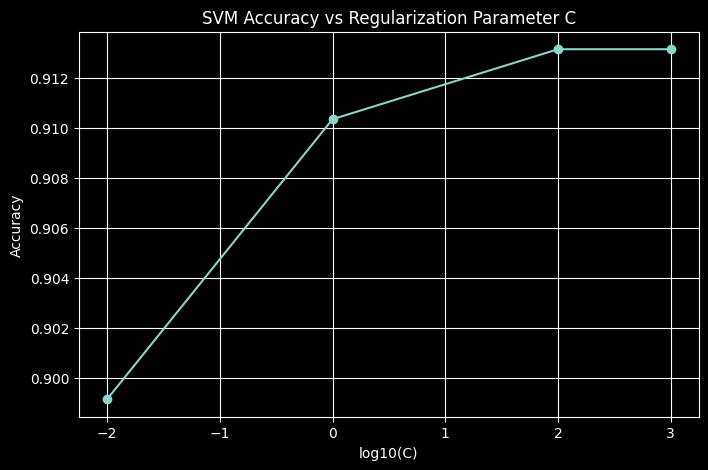

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

C_values = [1e-2, 1, 100, 1000]
accuracies = []

for c in C_values:
    # Run your classifier
    preds = svm_classifier(normalized_train_features, training_labels, normalized_test_features, c, kernel='linear')

    # Use the imported function correctly
    acc = accuracy_score(testing_labels, preds)
    accuracies.append(acc)
    print(f"C={c}: Accuracy={acc:.4f}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(np.log10(C_values), accuracies, marker='o', linestyle='-')
plt.xlabel('log10(C)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs Regularization Parameter C')
plt.grid(True)
plt.show()

In [0]:
# write your code here 


plt.legend(['train','test'])
plt.xlabel('log10(C)')
plt.ylabel('accuracy')
plt.show()